In [1]:
%matplotlib inline

# to plot the inferred maps, run step 0. and then go to the last cell


In [2]:
# step 0. parameters

### 60s sliding window, diffusivity only, not regularized ###

## data

trajectory_file = 'trajectories_2.txt' # from WT/2/folder_130425_22h_C03

## tessellation

# cell size
resolution = .1 # in um
# minimum number of locations per cell
nb_min = 20
# window duration
win = 60. # in s
# overlap between successive segments
overlap = 0. # 0%

## inference

localization_error = 0.03 # in um
diffusivity_smoothing = 0.
jeffreys_prior = False


from tramway.tessellation.window import SlidingWindow
from tramway.tessellation.hexagon import HexagonalMesh
from tramway.helper import *
from tramway.helper.simulation import *
import os.path
import random
import numpy as np
import time


rwa_file = os.path.splitext(trajectory_file)[0]+'_series.rwa'

mesh_label = 'hexagon_{:.0f}nm_win_{:.0f}_nb_min_{:d}'.format(round(resolution * 1e3), win, nb_min)

maps_label = 'sigma_{:.0f}_d_{:.0f}_j_{:d}'.format(round(localization_error * 1e3), diffusivity_smoothing, int(jeffreys_prior))


In [3]:
# step 2. tessellate

tessellate(rwa_file if os.path.exists(rwa_file) else trajectory_file,
        'hexagon', ref_distance=resolution, rel_avg_distance=1., min_location_count=0, knn=nb_min,
        time_window_duration=win, time_window_shift=win*(1.-overlap), time_window_options=dict(time_label=None),
        label=mesh_label)


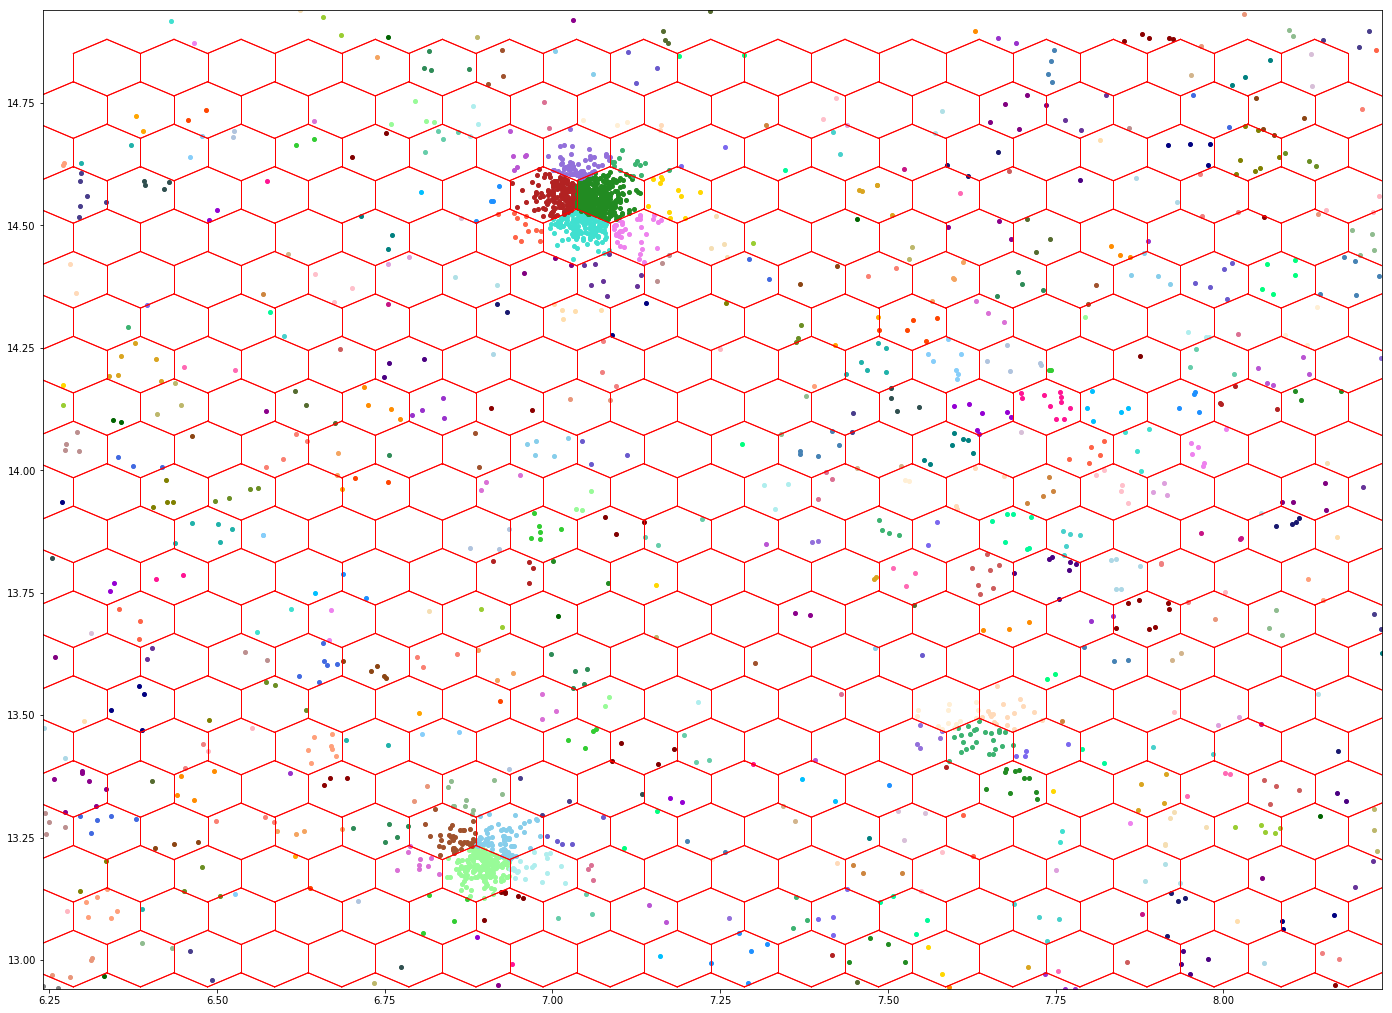

In [4]:
# plot the mesh for a segment

segment_index = 2

cell_plot(rwa_file, label=mesh_label, segment=segment_index, voronoi=dict(centroid_style=None))

In [5]:
# step 3. infer D

assert diffusivity_smoothing == 0

t0 = time.time()

infer(rwa_file, 'D',
     localization_error=localization_error,
     jeffreys_prior=jeffreys_prior,
     input_label=mesh_label, output_label=maps_label,
     cell_sampling='connected')

print('elapsed time: {:d}s'.format(round(time.time()-t0)))

elapsed time: 28s


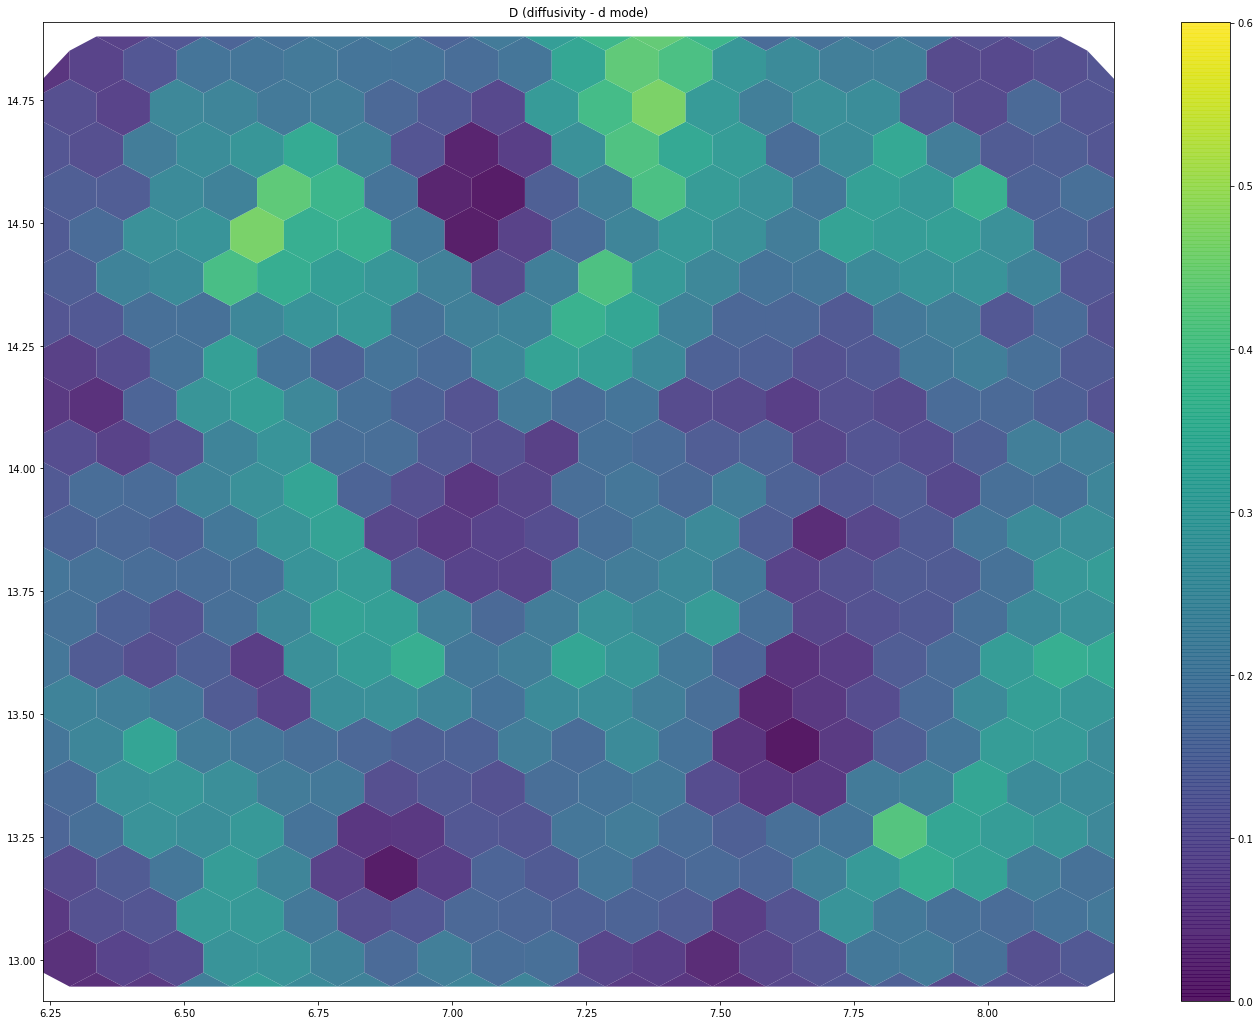

In [6]:
# plot the map for a segment

segment_index = 2

map_plot(rwa_file, label=(mesh_label, maps_label), segment=segment_index)
